In [1]:
import os
from tvb.simulator.lab import *
import numpy as np
import seaborn
import matplotlib.pyplot as plt
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose


input_path = '/Users/yilewang/workspaces/data4project/lateralization/connectome/zip/SNC/2820A.zip'


/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.10/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
def sj3d(input_path):
    connectivity.speed = np.array([10.])
    length = 1e4
    sim = simulator.Simulator(
        model=ReducedSetHindmarshRose(variables_of_interest=["xi", "eta", "tau", "alpha", "beta", "gamma"]), 
        connectivity=connectivity.Connectivity.from_file(input_path),
        coupling=coupling.Linear(a=np.array([0.015])),
        simulation_length=length,
        integrator=integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0,
                                                                                    random_stream=np.random.RandomState(seed=42))),
        monitors=(
        monitors.TemporalAverage(period=1.),
        monitors.Raw(),
        monitors.ProgressLogger(period=1e2))).configure()
    sim.configure()
    (tavg_time, tavg_data), (raw_time, raw_data),_ = sim.run()
    return raw_data




In [3]:
raw_data = sj3d(input_path)

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.
   INFO  step 1 time 0.0000 s
   INFO  step 8193 time 0.1000 s
   INFO  step 16385 time 0.2000 s
   INFO  step 24577 time 0.3000 s
   INFO  step 32769 time 0.4000 s
   INFO  step 40961 time 0.5000 s
   INFO  step 49153 time 0.6000 s
   INFO  step 57345 time 0.7000 s
   INFO  step 65537 time 0.8000 s
   INFO  step 73729 time 0.9000 s
   INFO  step 81921 time 1.0000 s
   INFO  step 90113 time 1.1000 s
   INFO  step 98305 time 1.2000 s
   INFO  step 106497 time 1.3000 s
   INFO  step 114689 time 1.4000 s
   INFO  step 122881 time 1.5000 s
   INFO  step 131073 time 1.6000 s
   INFO  step 139265 time 1.7000 s
   INFO  step 147457 time 1.8000 s
   INFO  step 155649 time 1.9000 s
   INFO  step 163841 time 2.0000 s
   INFO  step 172033 time 2.1000 s
   INFO  step 180225 time 2.2000 s
   INFO  step 188417 time 2.3

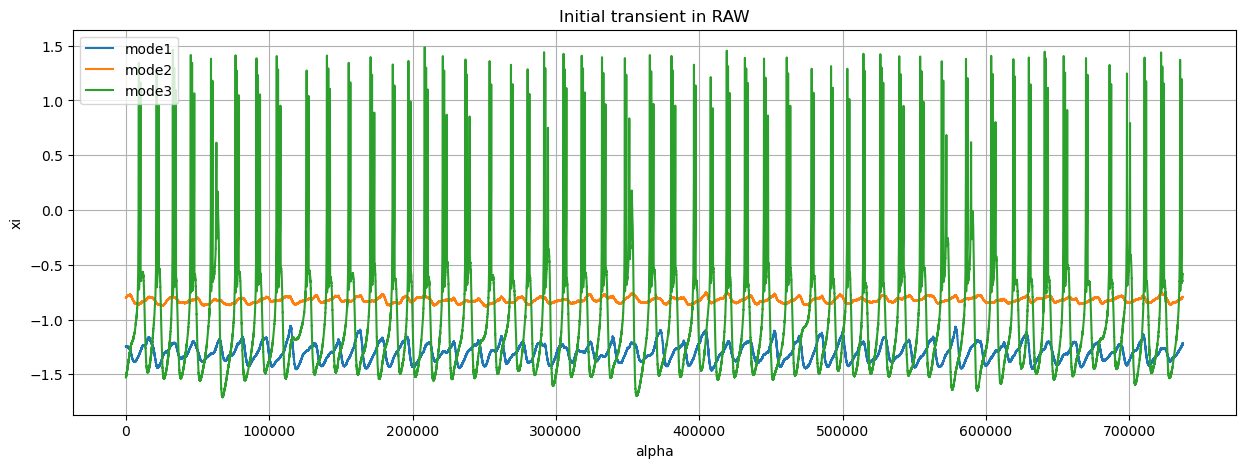

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(raw_data[81920:, 3, 4, 0], label='mode1')
plt.plot(raw_data[81920:, 3, 4, 1], label='mode2')
plt.plot(raw_data[81920:, 3, 4, 2], label='mode3')
plt.title('Initial transient in RAW')
plt.xlabel('times')
plt.ylabel('alpha')
plt.grid(True)
plt.legend()
plt.show()